# Getting started with MPSlib
This a small example getting started with MPSlib through an iPython notebook

In [2]:
#%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import mpslib as mps


### Setup MPSLib
First one need to initialize an instance of the mpslib object. 


In [11]:
# Initialize MPSlib using default algortihm, and seetings
O = mps.mpslib();

# Initialize MPSlib using the mps_snesim_tree algorthm, and a simulation grid of size [80,70,1]
O = mps.mpslib(method='mps_snesim_tree', simulation_grid_size=[80,70,1])

# specific parameters can be parsed directly when calling mps.mpslib (as abobve), or set by updating the O and O.par structure as 
#O.parameter_filename = 'mps_snesim.txt'
O.par['debug_level']=-1
O.par['n_cond']=36
O.par['n_real']=16
O.par['n_threads']=5
O.par['do_entropy']=1
O.par['simulation_grid_size']=np.array([80,50,1])

Using MPSlib installed in /mnt/d/PROGRAMMING/mpslib (from /mnt/d/PROGRAMMING/mpslib/scikit-mps/mpslib/mpslib.py)
Using MPSlib installed in /mnt/d/PROGRAMMING/mpslib (from /mnt/d/PROGRAMMING/mpslib/scikit-mps/mpslib/mpslib.py)


In [15]:
# All adjustable parameters for the specifric chosen MPSlib algorithm are
O.par

{'n_real': 16,
 'rseed': 1,
 'n_max_cpdf_count': 1,
 'out_folder': '.',
 'ti_fnam': 'ti.dat',
 'simulation_grid_size': array([80, 50,  1]),
 'origin': array([0., 0., 0.]),
 'grid_cell_size': array([1, 1, 1]),
 'mask_fnam': 'mask.dat',
 'hard_data_fnam': 'hard.dat',
 'shuffle_simulation_grid': 2,
 'entropyfactor_simulation_grid': 4,
 'shuffle_ti_grid': 1,
 'hard_data_search_radius': 1,
 'soft_data_categories': array([0, 1]),
 'soft_data_fnam': 'soft.dat',
 'n_threads': 5,
 'debug_level': -1,
 'do_estimation': 0,
 'do_entropy': 1,
 'template_size': array([8, 7, 1]),
 'n_multiple_grids': 3,
 'n_min_node_count': 0,
 'n_cond': 36}

### Choose training image

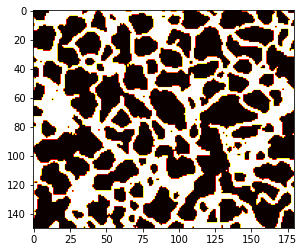

In [25]:

TI, TI_filename = mps.trainingimages.strebelle(di=2, coarse3d=1)
TI, TI_filename = mps.trainingimages.rot90()
O.par['ti_fnam']=TI_filename
plt.imshow(TI[:,:,0].T)

### Run MPSlib

The chosen MPSlib algorithm is run using a single thread by executing 

    O.run()
    
and using multiple threads by executing

    O.run_parallel()


In [26]:
#O.run()
if __name__ == '__main__':
    O.run_parallel()

parallel: using 5 threads to simulate 16 realizations
parallel: with up to 4 relizations per thread
parallel: Using 4 of max 52 threads
__name__ = mpslib.mpslib
Thread:000, nr=4
Thread:001, nr=4
Thread:002, nr=4
Thread:003, nr=4
mpslib: trying to run 'mps_snesim_tree' on 'mps_snesim_tree_002.txt' in folder '/mnt/d/PROGRAMMING/mpslib/mps_snesim_tree'mpslib: trying to run 'mps_snesim_tree' on 'mps_snesim_tree_001.txt' in folder '/mnt/d/PROGRAMMING/mpslib/mps_snesim_tree'mpslib: trying to run 'mps_snesim_tree' on 'mps_snesim_tree_000.txt' in folder '/mnt/d/PROGRAMMING/mpslib/mps_snesim_tree'


mpslib: trying to run 'mps_snesim_tree' on 'mps_snesim_tree_003.txt' in folder '/mnt/d/PROGRAMMING/mpslib/mps_snesim_tree'
mpslib: 'mps_snesim_tree' ran in    7.68s 
mpslib: 'mps_snesim_tree' ran in    8.02s 
mpslib: 'mps_snesim_tree' ran in    8.11s 
mpslib: 'mps_snesim_tree' ran in    8.12s 
parallel job done. Collecting data from threads
parallel: collected 16 realizations


### Plot some realizations using matplotlib

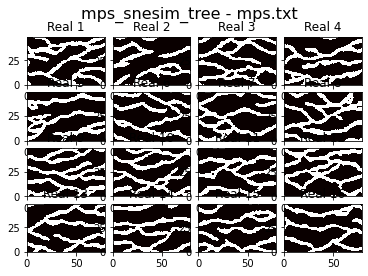

In [27]:
O.plot_reals()